<a href="https://colab.research.google.com/github/mmdebrahimi/Deep-Reinforcement-Learning/blob/main/Deep_RL_Practice_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def get_action(s, w):
  # print("s.dot(w) equals: :", s.dot(w))
  # print("S: ", s, "W: ", w)
  return 1 if s.dot(w) > 0 else 0

In [12]:
def play_one_episode(env, params):
  observation = env.reset()
  done = False
  t = 0
  r = 0
  while not done and t < 10000:
    t += 1
    # print("action ", t, ":")
    action = get_action(observation, params)
    observation, reward, done, info = env.step(action)
    r += reward
  # print("PARAMS: ", params)
  # print(100 * "-")
  return r

In [13]:
def play_multiple_episodes(env, T, params):
  episode_rewards = np.empty(T)

  for i in range(T):
    episode_rewards[i] = play_one_episode(env, params)
    # print(100*"X")
  avg_reward = episode_rewards.mean()
  # print("avg reward:", avg_reward)
  return avg_reward


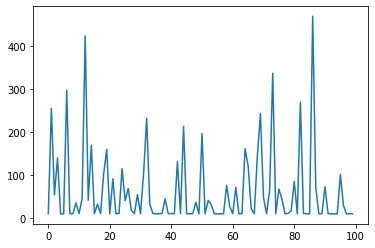

***Final run with final weights***
params:  [ 0.13487742 -0.00269133  0.74619609  0.50003131]


In [14]:
def random_search(env):
  episode_rewards = []
  best = 0
  params = None
  for t in range(100):
    new_params = np.random.random(4)*2 - 1 #it is size 4 because the state space is size 4
    # print("NEW PARAMS: ", new_params)
    avg_reward = play_multiple_episodes(env, 100, new_params)
    episode_rewards.append(avg_reward)

    if avg_reward > best:
      params = new_params
      best = avg_reward
  return episode_rewards, params
if __name__ == '__main__':
  env = gym.make('CartPole-v1')
  # print("ENV: ", env)
  episode_rewards, params = random_search(env)
  plt.plot(episode_rewards)
  plt.show()

  #play a final set of episodes
  print("***Final run with final weights***")
  print("params: ", params)
  play_multiple_episodes(env, 100, params)

